In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

%matplotlib inline


In [2]:
columns = ["index", "age", "sex", "started_with", "perceived_formal", "perceived_informal"]
df_survey = pd.read_csv("./data/survey_data.csv", skiprows=3, index_col=0, names=columns, usecols=range(len(columns)), nrows=31)

df_survey.head()


,age,sex,started_with,perceived_formal,perceived_informal
index,,,,,
1,22,f,formal,reliable,unreliable
2,21,m,informal,reliable,unreliable
3,24,NaN,formal,reliable,reliable
4,23,NaN,formal,reliable,reliable
5,24,NaN,formal,very reliable,reliable


In [3]:
df_survey.tail()


,age,sex,started_with,perceived_formal,perceived_informal
index,,,,,
27,23,f,informal,very reliable,reliable
28,26,f,formal,reliable,reliable
29,21,f,informal,reliable,reliable
30,22,m,formal,reliable,unreliable
31,25,m,informal,unreliable,reliable


In [4]:
experiment_options_dict = {"very unreliable": 1, "unreliable": 2, "reliable": 3, "very reliable": 4}
formal_bool_dict = {"formal": True, "informal": False}

df_survey["perceived_formal_int"] = df_survey["perceived_formal"].apply(lambda x: experiment_options_dict.get(x))
df_survey["perceived_informal_int"] = df_survey["perceived_informal"].apply(lambda x: experiment_options_dict.get(x))

df_survey["started_with_bool"] = df_survey["started_with"].apply(lambda x: formal_bool_dict.get(x))

df_survey["sex"].fillna("x", inplace=True)


In [5]:
df_perceived_formal = df_survey[["perceived_formal_int"]]
df_perceived_formal["formal"] = "Formal Chatbot"

df_perceived_informal = df_survey[["perceived_informal_int"]]
df_perceived_informal["formal"] = "Informal Chatbot"

df_perceived_formal.columns = ["perceived", "formal"]
df_perceived_informal.columns = ["perceived", "formal"]

df_perceived = pd.concat([df_perceived_formal, df_perceived_informal], ignore_index=True)
df_perceived


C:\Users\denbe\AppData\Local\Temp\ipykernel_14804\788118895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perceived_formal["formal"] = "Formal Chatbot"
C:\Users\denbe\AppData\Local\Temp\ipykernel_14804\788118895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perceived_informal["formal"] = "Informal Chatbot"


,perceived,formal
0,3,Formal Chatbot
1,3,Formal Chatbot
2,3,Formal Chatbot
3,3,Formal Chatbot
4,4,Formal Chatbot
...,...,...
57,3,Informal Chatbot
58,3,Informal Chatbot
59,3,Informal Chatbot
60,2,Informal Chatbot


In [6]:
df_survey.head()


,age,sex,started_with,perceived_formal,perceived_informal,perceived_formal_int,perceived_informal_int,started_with_bool
index,,,,,,,,
1,22,f,formal,reliable,unreliable,3,2,True
2,21,m,informal,reliable,unreliable,3,2,False
3,24,x,formal,reliable,reliable,3,3,True
4,23,x,formal,reliable,reliable,3,3,True
5,24,x,formal,very reliable,reliable,4,3,True


In [7]:
mean_formal, std_formal = df_survey["perceived_formal_int"].mean(), df_survey["perceived_formal_int"].std()
mean_informal, std_informal = df_survey["perceived_informal_int"].mean(), df_survey["perceived_informal_int"].std()

round(mean_formal, 2), round(std_formal, 2), round(mean_informal, 2), round(std_informal, 2)


(3.13, 0.56, 2.81, 0.54)

In [8]:
experiment_options = ["very unreliable", "unreliable", "reliable", "very reliable"]
palette = {"Formal Chatbot": "#FFCD00", "Informal Chatbot": "#C00A35"}


df_formal = df_survey["perceived_formal"].value_counts().reindex(experiment_options, fill_value=0)
df_informal = df_survey["perceived_informal"].value_counts().reindex(experiment_options, fill_value=0)

df_formal, df_informal

(very unreliable     0
 unreliable          3
 reliable           21
 very reliable       7
 Name: perceived_formal, dtype: int64,
 very unreliable     0
 unreliable          8
 reliable           21
 very reliable       2
 Name: perceived_informal, dtype: int64)

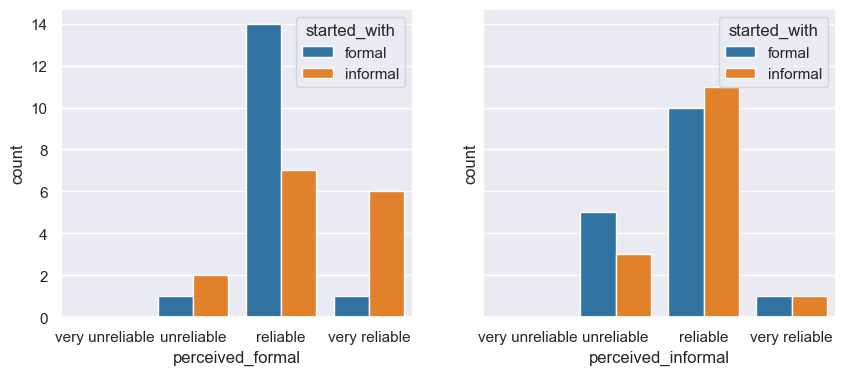

In [9]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, sharey=True, sharex=True)
sns.countplot(data=df_survey, x="perceived_formal", hue="started_with", order=experiment_options, ax=ax1)
sns.countplot(data=df_survey, x="perceived_informal", hue="started_with", order=experiment_options, ax=ax2)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


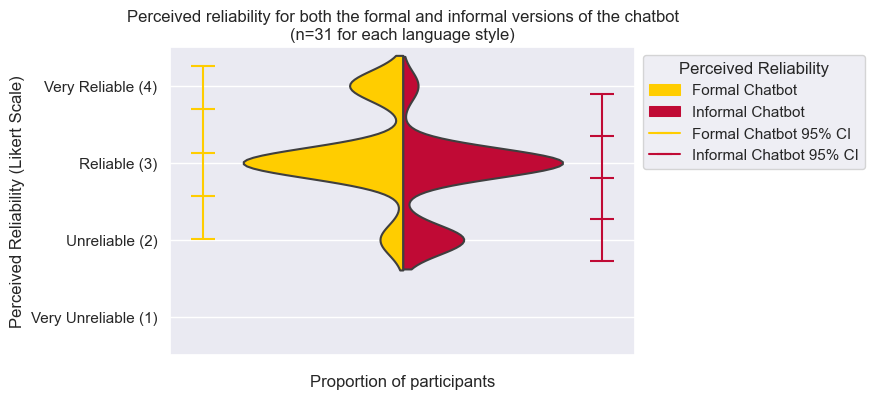

In [10]:
df_perceived["placeholder"] = ""  # Needed for seaborn to work

fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(data=df_perceived, x="placeholder", y="perceived", hue="formal",
               split=True, inner=None, scale="width", ax=ax, bw=0.35)

ax.collections[0].set_facecolor("#FFCD00")  # Set color of violin plot
ax.collections[1].set_facecolor("#C00A35")

ax.set_xlabel("Proportion of participants")
ax.set_ylabel("Perceived Reliability (Likert Scale)")

plt.errorbar([-0.5] * 5, [mean_formal - std_formal * 2, mean_formal - std_formal, mean_formal, mean_formal + std_formal, mean_formal + std_formal * 2],
             xerr=0.03, color="#FFCD00", label="Formal Chatbot 95% CI")
plt.errorbar([0.5] * 5, [mean_informal - std_informal * 2, mean_informal - std_informal, mean_informal, mean_informal + std_informal, mean_informal + std_informal * 2],
             xerr=0.03, color="#C00A35", label="Informal Chatbot 95% CI")

yticks = np.arange(1, 5)
plt.yticks(yticks, [f"{label.title()} ({i})" for i, label in enumerate(experiment_options, start=1)])  # Center x labels between both bars

plt.legend(loc="upper left", title="Perceived Reliability", bbox_to_anchor=(1, 1), )
ax.get_legend().legendHandles[0].set_color("#FFCD00")
ax.get_legend().legendHandles[1].set_color("#C00A35")

plt.title(f"Perceived reliability for both the formal and informal versions of the chatbot\n(n={df_survey.shape[0]} for each language style)")
plt.ylim(0.5, 4.5)

plt.savefig("./images/perceived_reliability_violin.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()


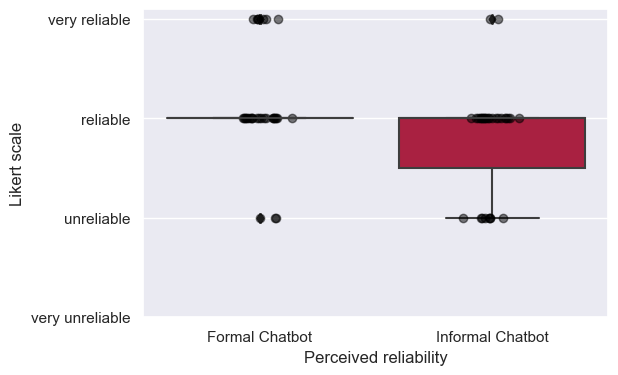

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df_perceived, x="formal", y="perceived", palette=palette)

ax.set_xlabel("Perceived reliability")
ax.set_ylabel("Likert scale")

x = np.random.normal(0, 0.05, size=31)
plt.plot(x, df_survey["perceived_formal_int"], "o", color="black", alpha=0.5, label="Formal Chatbot")
x = np.random.normal(1, 0.05, size=31)
plt.plot(x, df_survey["perceived_informal_int"], "o", color="black", alpha=0.5, label="Informal Chatbot")


xticks = np.arange(1, 5)
plt.yticks(xticks, experiment_options)  # Center x labels between both bars
# plt.legend(loc="upper left", title="Perceived reliability", bbox_to_anchor=(1, 1), )
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


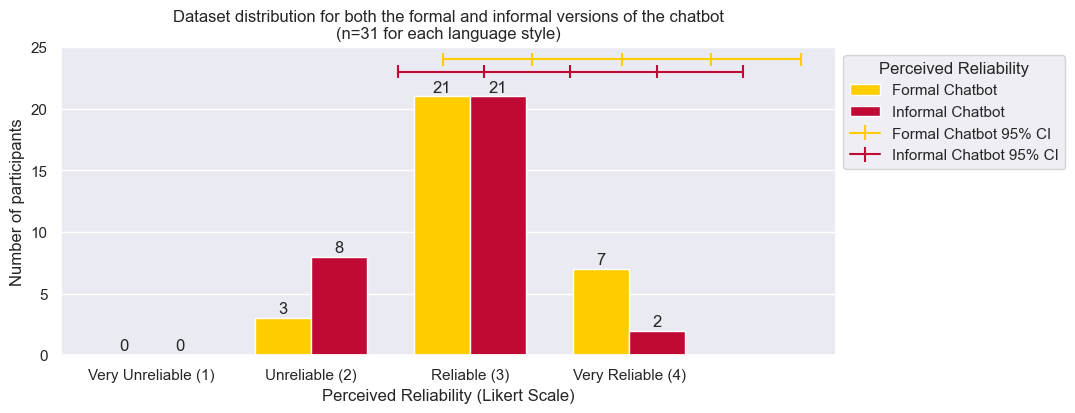

In [12]:
CI_INTERVAL = True  # Set to True to show 68% CI interval

xticks = np.arange(df_formal.shape[0])
width = 0.35

fig, ax = plt.subplots(figsize=(10, 4))
ax1 = plt.bar(xticks, df_formal, width=width, color="#FFCD00")
ax2 = plt.bar(xticks + width, df_informal, width=width, color="#C00A35")

if CI_INTERVAL:
    plt.errorbar([mean_formal - std_formal * 2, mean_formal - std_formal, mean_formal, mean_formal + std_formal, mean_formal + std_formal * 2],
                 [24] * 5, yerr=std_formal, color="#FFCD00", label="Formal Chatbot 95% CI")
    plt.errorbar([mean_informal - std_informal * 2, mean_informal - std_informal, mean_informal, mean_informal + std_informal, mean_informal + std_informal * 2],
                 [23] * 5, yerr=std_informal, color="#C00A35", label="Informal Chatbot 95% CI")

xticks_labels = list(df_formal.index.str.title())
plt.xticks(xticks + width / 2, [f"{label.title()} ({i})" for i, label in enumerate(experiment_options, start=1)])  # Center x labels between both bars

plt.legend(["Formal Chatbot", "Informal Chatbot", "Formal Chatbot 95% CI", "Informal Chatbot 95% CI"],
           loc="upper left", bbox_to_anchor=(1, 1), title="Perceived Reliability")
plt.title(f"Dataset distribution for both the formal and informal versions of the chatbot\n(n={df_survey.shape[0]} for each language style)")

ax.yaxis.get_major_locator().set_params(integer=True)  # Force y-axis to be integers

ax.bar_label(ax1, padding=1)
ax.bar_label(ax2, padding=1)

plt.ylim(0, 25)
plt.grid(axis="x")

plt.xlabel("Perceived Reliability (Likert Scale)")
plt.ylabel("Number of participants")

if CI_INTERVAL:
    fp = "./images/perceived_reliability_ci.eps"
else:
    fp = "./images/perceived_reliability.eps"

plt.savefig(fp, format="eps", bbox_inches="tight", dpi=300)
plt.show()


In [13]:
df_merged = pd.merge(df_formal, df_informal, left_index=True, right_index=True)
df_merged


,perceived_formal,perceived_informal
very unreliable,0,0
unreliable,3,8
reliable,21,21
very reliable,7,2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


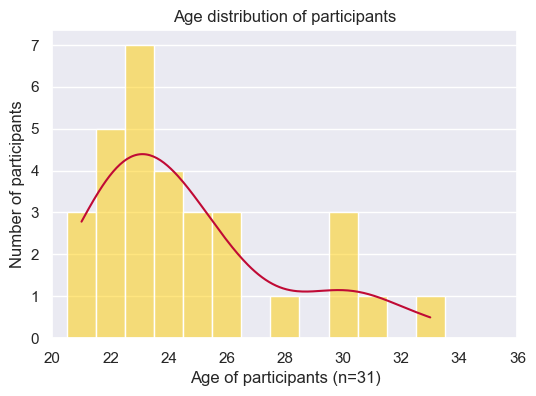

In [14]:
# Plot the age distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df_survey, x="age", ax=ax, kde=True, stat="count", color="#FFCD00", binrange=(18, 35), discrete=True)
ax.lines[0].set_color("#C00A35")

# Add missing ticks
plt.xlim(20, 36)
plt.grid(axis="x")

plt.title("Age distribution of participants")
plt.xlabel("Age of participants (n=31)")
plt.ylabel("Number of participants")

plt.savefig("./images/age_distribution.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


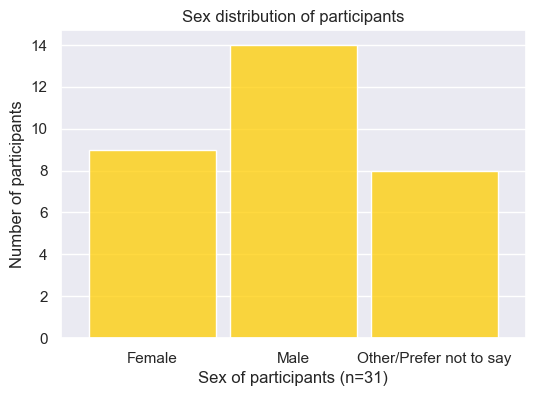

In [15]:
# Plot the age distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df_survey, x="sex", ax=ax, stat="count", color="#FFCD00", discrete=True)

# Change the width of the bars
for p in ax.patches:
    width = 0.9
    p.set_width(width)
    p.set_x(p.get_x() + (1 - width) * 0.5)  # Center bars

# Add missing ticks
plt.grid(axis="x")

plt.title("Sex distribution of participants")
plt.xlabel("Sex of participants (n=31)")
plt.ylabel("Number of participants")

# Rename x ticks
plt.xticks(range(3), ["Female", "Male", "Other/Prefer not to say"])

plt.savefig("./images/sex_distribution.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()


Q1: 22.5
Q3: 26.0
IQR: 3.5


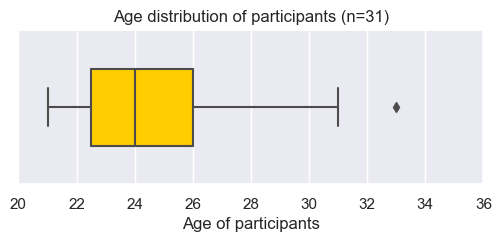

In [16]:
# Plot the age distribution
fig, ax = plt.subplots(figsize=(6, 2))

# Only show one half of the violin plot
df_survey["placeholder"] = ""
# sns.violinplot(data=df_survey, x="age", ax=ax, color="#FFCD00", split=True,
#                inner="quartile", hue=True, hue_order=[True, False], y="placeholder", cut=0)

sns.boxplot(data=df_survey, x="age", ax=ax, color="#FFCD00", width=0.5, saturation=1)

# Move boxplot to the front
# ax.collections[0].set_facecolor("#C00A35")
# ax.collections[0].set_zorder(0.9)
# ax.legend_.remove()

# Get IQR
q1 = df_survey["age"].quantile(0.25)
q3 = df_survey["age"].quantile(0.75)
iqr = q3 - q1

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

plt.xlim(20, 36)

plt.title("Age distribution of participants (n=31)")
plt.xlabel("Age of participants")

plt.savefig("./images/age_distribution_box.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()
